## Libraries 

In [510]:
import numpy as np
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

## The purpose of this Sprint

<li>Understanding linear regression through scratch</li>
<li>Get used to object-oriented implementation</li>
<li>Allow formulas to be incorporated into code</li>

## How to learn
After implementing linear regression with scratch, we will train and verify.

## Scratch Linear Regression
We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.


The template is prepared below. Add some code to this ScratchLinearRegression class.


In [511]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # バイアス項有無で分岐
        if self.no_bias is not True:   
            # パラメータθの初期値を乱数で与える
            x1 = self._linear_hypothesis(X)
            # θはXの特徴量の種類の数分用意する
            self.theta = np.random.random(x1.shape[1])

        else:
            x1 = X
            self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta.T)
            
            # 真の値と予測値の誤差を計算
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if X_val is not None:
                if self.no_bias is not True:
                    x2 = self._linear_hypothesis(X_val)
                else:
                    x2 = X_val
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## Problem1: Hypothetical function
Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template
<center> $h_{\theta}(x) = \theta_{0}.x_{\theta} + \theta_{1}.x_{1} + \theta_{2}.x_{2} + \theta_{3}.x_{3} + ... +\theta_{n}.x_{n}  (x_{0}=1)$</center>

$x$: Feature vector

$\theta$: parameter vector


$n$: Number of features


$x_j$: jth feature


$\theta_j$: jth parameter (weight)

The feature quantity $ n $ should be implemented so that it can correspond to any value.
The vector format is as follows.
<center> $h_{\theta}(x) = \theta^{T}.x $</center>

Since it is a method that is never called from outside the class, it is customary in Python to prefix it with an underscore.
```
def _linear_hypothesis(self, X):
    """
    Compute a linear hypothetical function
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function
    """
    pass
    return
```

In [512]:
def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)

## Problem 2: Steepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.
<center> $\theta_{j} = \theta_{j} - α \frac{1}{m} \sum_{i=1}^{m} [(h_{x}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}] $</center>

$\alpha$: learning rate

$i$: sample index

$j$: Feature index

Add the following method to the ScratchLinearRegression class. Please also describe the commented out part.
```
def _gradient_descent(self, X, error):
    """
    Write a description
    """
    pass
```

In [513]:
def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)

## Problem 3: Estimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.


The output of the hypothetical function $h_\theta(x)$ is the estimation result.

In [514]:
def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## Problem 4: Mean squared error
Create a function of mean square error (MSE) used as an index value for linear regression.


Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.


The mean square error is expressed by the following formula.

<center> $L(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta} (x^{i}) - y^{i})^2 $</center>

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

As the objective function (loss function) for the steepest descent method, divide this by 2 and use it. (Problems 5, 9)

```
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    pass
    return mse
```

In [515]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    (1/len(y_pred))* np.sum(np.square(y_pred - y))
    return mse

## Problem 5: Objective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this in self.loss,self.val_loss.


The objective function (loss function) $J(\theta)$ is the following formula.

<center> $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)} - y^{(i)}))^2 $</center>

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

## Problem 6: Learning and estimation
Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.


Compare this with the scikit-learn implementation and see if it works correctly.

In [516]:
data = pd.read_csv('train.csv')

In [517]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [518]:
X = data.loc[:,"LotArea"]
X.head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [519]:
X.shape

(1460,)

In [520]:
Y = data.iloc[:,-1]
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(),test_size = 0.25)

In [522]:
print("X_train_trans.shape:", X_train.shape)
print("X_test_trans.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train_trans.shape: (1095,)
X_test_trans.shape: (365,)
y_train.shape: (1095,)
y_test.shape: (365,)


In [523]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1,1))

X_train_trans = scaler.transform(X_train.reshape(-1,1))
X_test_trans = scaler.transform(X_test.reshape(-1,1))

In [524]:
my_model = ScratchLinearRegression(1000,0.02,False,False)

In [525]:
print(X_train_trans.shape)
print(y_train.shape)
print(X_test_trans.shape)
print(y_test.shape)

(1095, 1)
(1095,)
(365, 1)
(365,)


In [526]:
my_model.fit(X_train_trans,y_train,X_test_trans,y_test)

In [527]:
y_pred = my_model.predict(X_test_trans)

Root mean square error 74328.05499681557


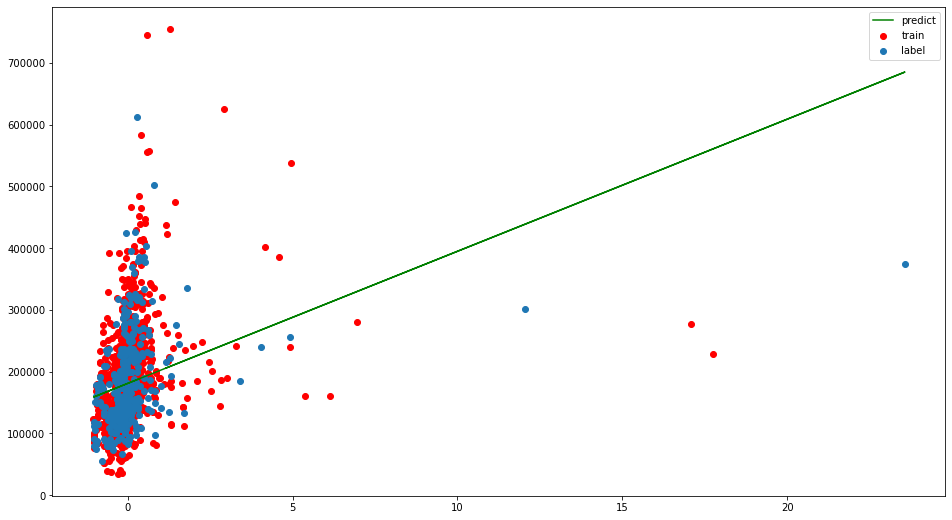

In [528]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

## Problem 7: Learning curve plot
Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.


In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.

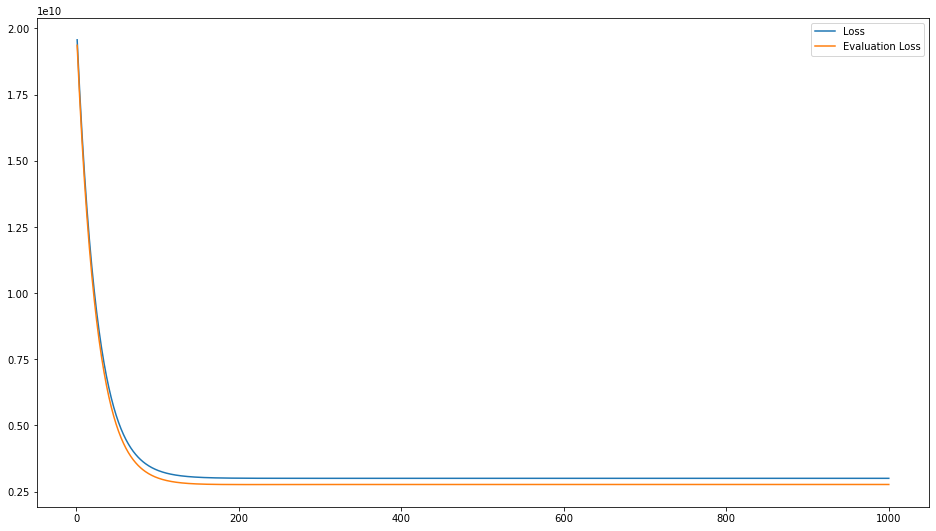

In [529]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.val_loss),label='Evaluation Loss',)
_ = plt.legend()

## Problem 8: (Advance task) Removal of bias term
Verify how learning changes when the bias term $\theta_0$ is removed. Also, consider and investigate the role of bias terms in linear regression models.

In [530]:
new_model = ScratchLinearRegression(1000,0.02,True,False)

In [531]:
new_model.fit(X_train_trans,y_train,X_test_trans,y_test)

In [532]:
y_pred = new_model.predict(X_test_trans)

Root mean square error 74328.05499681557


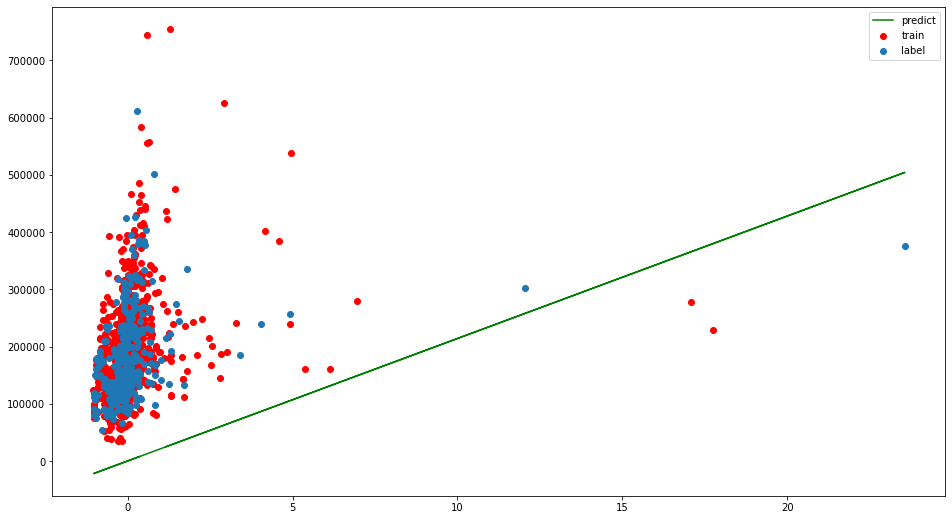

In [533]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

# mse = my_model.MSE(y_pred)
# mse = (1/len(y_pred))* np.sum(np.square(y_pred - y_test))
mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

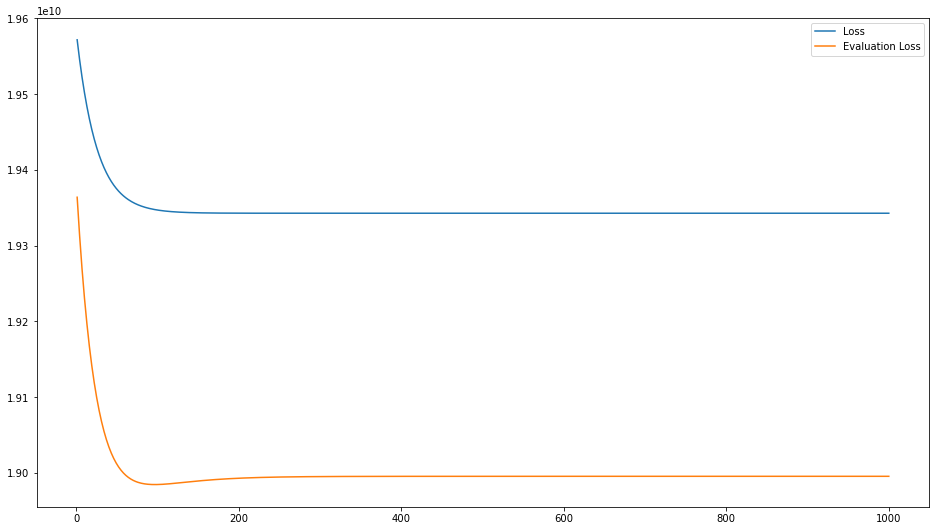

In [534]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.val_loss),label='Evaluation Loss',)
_ = plt.legend()

In linear regression, bias help to increase accuracy result for the models

## Problem 9: (Advance task) Multidimensional feature quantity
Please verify how the learning result changes when the square or cube of the feature is used for input.

In [535]:
X = data[['YearBuilt', 'LotArea', 'MoSold']]
X.head()

,YearBuilt,LotArea,MoSold
0,2003,8450,2
1,1976,9600,5
2,2001,11250,9
3,1915,9550,2
4,2000,14260,12


In [536]:
X = X.values

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [538]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1095, 3)
X_test.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [539]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [540]:
print("X_train_trans.shape:", X_train_trans.shape)
print("X_test_trans.shape:", X_test_trans.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


X_train_trans.shape: (1095, 3)
X_test_trans.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [541]:
multi_model = ScratchLinearRegression(1000,0.02,False,False)

In [542]:
multi_model.fit(X_train_trans,y_train,X_test_trans,y_test)

In [543]:
y_pred = multi_model.predict(X_test_trans)
mse = MSE(y_pred,y_test)
print("Mean square error",mse)
print("root mean square error",np.sqrt(mse))

Mean square error 5524659759.60964
root mean square error 74328.05499681557


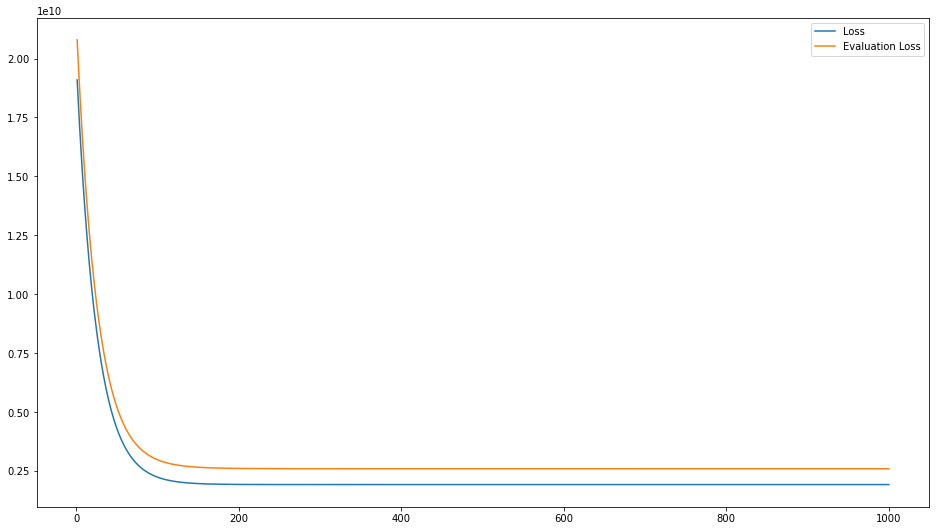

In [544]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.val_loss),label='Evaluation Loss',)
_ = plt.legend()

## Problem 10: (Advance task) Derivation of update formula
The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

<center> $\theta{j} = \theta_{j} -  α \frac{1}{m} \sum_{1}^{m} {[h_{\theta}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$ </center>


You can start the explanation with the following formula.

<center> $θ_{j} = \theta_{j} - \frac{\partial}{\partial\theta_{j}} J(\theta) $ </center>


Objective function (loss function) J(θ)Is the following formula.

<center>$ J(\theta) = \frac{1}{2m} \sum_{1}^{m} {(h_{\theta}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

### Explanation
From the formular $J(\theta) = \frac{1}{2m} \sum {(h_{\theta}(x^{(i)}) - y^{(i)} )^{2}}$ 

I got
$J(\theta) = \frac{1}{n} || y - \hat y ||^{2}$

$= \frac{1}{m} ( y - \hat y )^{T} ( y - \hat y )$

$= \frac{1}{m} ( y - xw )^{T} ( y - xw )$

$= \frac{1}{m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

$L = \frac{J}{2}$ = $\frac{1}{2m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

Differentiate to ***L*** to ***$\theta$***

$\frac{\partial L}{\partial\theta} = \frac{\partial}{\partial\theta} (y^{T}y - 2\theta^{T}x^{T}y - \theta^{T}x^{T}x\theta)$

$= \frac{1}{2m} ( - 2x^{T}y - 2x^{T}x\theta )$

$= \frac{1}{m} x^{T} (y - x\theta)$

$ = \frac{1}{m} x^{T}(y - \hat y)$

#### Update theta

$\theta_{j} = \theta_{j} -  \frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$

#### Multiply with learning rate

$\theta_{j} = \theta_{j} -   α\frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$ or  $\theta_{j} = \theta_{j} -  α \frac{1}{m} \sum _{1}^{m} {[h_{\theta}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$

## Problem 11: (Advance task) Problem of local optimum solution
The steepest descent method generally has the problem of locally optimal solutions. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain it using mathematical formulas and graphs for some reason.

### Explanation
The cost function of Linear Regression: <center>$ J(\theta) = \frac{1}{2m} \sum_{1}^{m} {(h_{\theta}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

This is a quadratic function. The quadratic function is proved to be convex so it ensures that the minimum exist and it will reach the global minimum with correct learning rate. Here is the shape of quadratic function and how it find the global minimal.

![alt text](convex.png "Convex")